# Principal Component Analysis

In our last class we derived our first model *Linear Regression* by appealing to ideas from Linear Algebra (and Calculus). In the chapter before that we took some time to explore our data particularly looking at graphs and categorical variables trying to identify relations between predictors or relations between predictors and results. We also saw that in some cases adding additional variables helped us explain additional details of our model.

You might, at this point, be a little bit unsettled. Particularly if your dataset is one with many features or has categorical features that with one-hot-encoding will become many features. How can we possibly identify all the relationships between features or identify the features that are most important in explaining our model. It is frankly, when we are thinking about a model with 81 features (before one-hot-encoding) a bit overwhelming.

What we would like is a method of identifying the most important features in a model, the ones that will go the furthest to explaining our result value. Ideally this is a method that will work automatically without us having to make decisions. Luckily *Linear Algebra* again comes to the rescue with a result called *The Singular Value Decomposition* of a matrix which leads to the *Principal Component Analysis* of the predictors. 

We will take some time to describe this result here, for those of you who have had Linear Algebra. However at the end of the day this will be one more tool from scikitlearn that we will learn to use and if necessary you can think of it as a black-box (i.e. you put your matrix of predictors into it and it spits out the most important features). If you are interested in further background, I suggest the book *Applied Linear Algebra* by Gilbert Strang which is now available for free on the MIT Open Courseware Website.

Now what we will actually get will be **linear combinations of the predictors** ordered by the the ones that explain the largest propotion of the variation between the samples.

## Eigenvalue Decomposition of Square Matrix

We begin our story by going back to what was probably one of the last things you learned about in your Linear Algebra class. Given a square matrix we can define eigenvalue and eigenvector pairs $(\lambda, v)$ as solutions to the equation:

$$ A v = \lambda v $$

Roughly these are vector directions in which $A$ actcs as a scalar. Putting the eigenvectors $v$ as columns of a matrix $Q$ we have:

$$ A = Q D Q^{-1} $$

where $Q$ is a matrix whose columnns are Eigenvectors; and $D$ is a diagonal matrix of the eigenvectors:

$$ D = \begin{pmatrix} \lambda_0 & 0 & \dots \\ 0 & \lambda_1 & 0 & \dots \\ & & \ddots  \\ & & & \lambda_n \end{pmatrix} $$

In the non-generic cases (i.e. special and rare cases) this decomposition is not possible, but generalizations of it, where $D$ is not diagonal, are. In the case that $A$ is symmetric ($A = A^T$) then this is further specialized to:

$$ A = Q D Q^T $$

where $Q Q^T = I$. A symmetric matrix also guaruntees that the eigenvalues are real.

### Computing Eigenvalues

You may have learned some techniques for computing eigenvalues. Usually you first learn that you can find them by solving the equation 

$$ \mbox{det}( A - \lambda I) = 0 $$

It turns out that this is generally not a great way compute them as it amounts to solving a polynomial of degree $n$. There are other 
techniques that are much more effecient especially if what we want are approximate eigenvalues. These are what are implemented in Python's numpy module.

In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
# Just to be explicit; let A be a square matrix

A = np.array([ [1, 1, 2], [1, 3, 1], [2, 1, 0]])
print(A, A.shape)

[[1 1 2]
 [1 3 1]
 [2 1 0]] (3, 3)


In [4]:
lam, Q = la.eig(A)
print(lam, '\n', Q)

[-1.56884961  1.36444806  4.20440155] 
 [[ 0.60350126 -0.6228405  -0.49785133]
 [ 0.04218655  0.64843974 -0.76009618]
 [-0.79624527 -0.43771637 -0.41760969]]


In [5]:
Q @ Q.transpose()

# note that we get the identity up to a machine 0.

array([[ 1.00000000e+00,  0.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00, -2.22044605e-16],
       [-5.55111512e-17, -2.22044605e-16,  1.00000000e+00]])

## Singular Value Decomposition

Note though that for us, we are dealing with matrices $X$ that have many more rows than columns (or in the case of image problems many more columns than rows). Essentially square matrices will not happen. However, noting what we learned with *Linear Regression* in the last chapter, it is maybe not a surprise that what we might want to consider is 

$$ X^T X \qquad \mbox{or} \qquad X X^T $$

If $X$ is $n$ by $m$ then $X^T X$ is square $m$ by $m$; while $X X^T$ is square $n$ by $n$. We could then compute their eigenvalue diagonalizations: 

$$ X^T X = V D_1 V^T $$ 

and 

$$ X X^T = U D_2 U^T $$

where $V V^T = I_m $ and $ U U^T = I_n$ Note that the two identies are not equal and also that the diagonal matrices have different sizes.

The singular value decomposition of $X$ is then:

$$ X = U \Sigma V^T $$

The columns of $U$ and $V$ are left- and right-singular vectors and the $\Sigma$ is a pseudo-diagonal matrix (it is $n$ by $m$ rather than square) of the singular values, which are positive real numbers:

$$ \Sigma = \begin{pmatrix} s_0 & 0 & \dots \\ 0 & s_1 & \dots \\ \vdots & \vdots & \ddots \\ 0 & \dots & 0 \end{pmatrix} $$

$\Sigma$ is unique, up to the order of the singular values, however the $U$ and $V$ are not unique. If we order $\Sigma$ so that $s_0 > s_1 > \dots > s_m $ then $V$ gives an operation that picks out of $X$ the most important contributions in order. I.e. transforming $X$ by the first $k$ columns of $V$ will give $k$ orthonormal linear combination of the columns of $X$ that produce column vectors that are the $k$ most important in explaining the variation of the entries of $X$. 

This is a little bit wishy-washy, so lets do a concrete example. 

### Iris Example

In [6]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
ird = pa.read_csv('Data Sets/iris.csv')
ird.head()

,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This is a collection of data giving the dimensions of the sepals and petals of three species of irises. The task is to predict the species from these values. It is relatively small for our class with only 150 samples and 5 features (4 predictors and 1 result) however it fullfills the important part of being largely non-square with more samples than predictors.

In [8]:
ird.shape

(150, 5)

In [9]:
# Build a matrix of the predictors and results

X = np.array(ird.iloc[:, 0:4])
y = np.array(ird.iloc[:, 4])

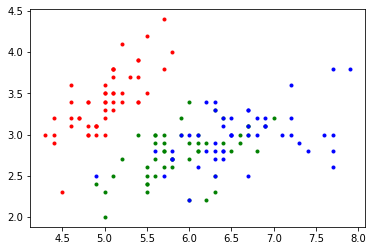

In [10]:
# We can check how the predictors do at classifying flower types by graphing individual pairs for example Sepal_Length and Sepal_Width

plt.plot(X[y==0, 0], X[y==0, 1], 'r.')
plt.plot(X[y==1, 0], X[y==1, 1], 'g.')
plt.plot(X[y==2, 0], X[y==2, 1], 'b.');

On the one hand this is pretty good, and in fact it is clear that these two variables could easily be used to classify the flower type as 0 and not 0 with minimal error. However we have four variables and maybe by combining all 4 and taking the two best predictors we can do better.

In [12]:
u, s, vt = la.svd(X, full_matrices=True)
u.shape, s.shape, vt.shape

((150, 150), (4,), (4, 4))

In [13]:
print(s)

[95.95066751 17.72295328  3.46929666  1.87891236]


In [14]:
# We can build sigma from s
sigma = np.append(np.diag(s), np.zeros((150-4, 4)), axis=0 )
sigma[:10, :]

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [15]:
print( (u @ sigma @ vt - X)[0:10, :] )
# Check that u, sigma, and vt reconstruct X

[[ 1.77635684e-15  1.02140518e-14  7.77156117e-15  4.38538095e-15]
 [ 0.00000000e+00  0.00000000e+00  6.21724894e-15  1.27675648e-15]
 [ 0.00000000e+00  1.77635684e-15  0.00000000e+00 -8.32667268e-16]
 [ 0.00000000e+00  1.33226763e-15  0.00000000e+00 -4.99600361e-16]
 [ 0.00000000e+00  1.77635684e-15  2.22044605e-16 -5.55111512e-17]
 [ 8.88178420e-16  2.66453526e-15  8.88178420e-16  2.22044605e-16]
 [-8.88178420e-16  1.33226763e-15  8.88178420e-16  2.77555756e-16]
 [ 8.88178420e-16  1.33226763e-15  4.44089210e-16 -5.55111512e-17]
 [ 0.00000000e+00  1.33226763e-15  0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00 -2.77555756e-17]]


In [16]:
v = vt.transpose()

# The columns of v given, in descending order, the most important factors explaining the variations in X

In [17]:
# Take the two most important factors and build a new X

X2 = X @ v[:, 0:2]

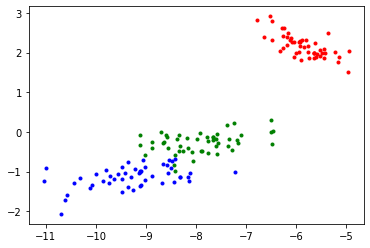

In [18]:
# We can check how the predictors do at classifying flower types by graphing individual pairs for example Sepal_Length and Sepal_Width

plt.plot(X2[y==0, 0], X2[y==0, 1], 'r.')
plt.plot(X2[y==1, 0], X2[y==1, 1], 'g.')
plt.plot(X2[y==2, 0], X2[y==2, 1], 'b.');

The size of the singular values actually identifies how important the new feature is. The more rapidly they decay the better the early features do at explaining the variations in the data.

#### Principal Component Analysis

Scikitlearn contains a variation on this method called Principal Component Analysis that does the computation here, but also normalizes the results in a way that is better suited for data analysis and varies the routines and approximations to run as effeciently as possible on the data you use. It also has some attached functions that can be used to illustrate how well the method has worked.



In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

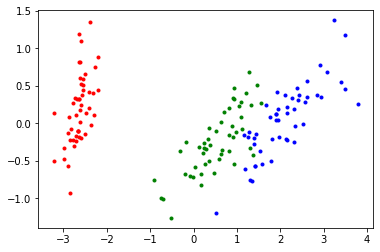

In [21]:
# We can check how the predictors do at classifying flower types by graphing individual pairs for example Sepal_Length and Sepal_Width

plt.plot(Xpca[y==0, 0], Xpca[y==0, 1], 'r.')
plt.plot(Xpca[y==1, 0], Xpca[y==1, 1], 'g.')
plt.plot(Xpca[y==2, 0], Xpca[y==2, 1], 'b.');

In [22]:
# The explained variance quantifies the propotion of the variation in the values of X that have been explained by each component

print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


Note that PCA is our first example of an unsupervised learning method (it works independently of the result values and rather tries to organize the predictors).

### Use in a Model

So fine this looks better, but is it actually producing a better model. So first of all it is unlikely to produce a better model if we use all of the features. The power of PCA is in identifying new features that will let us build a model faster. Let's compare using the logistic model on the data above using just the first two features and then using the first two principle components.

In [24]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
cat1 = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.8083333333333333, 0.7333333333333333)

In [27]:
import matplotlib.colors as pltco # A package to help with coloring plots

In [28]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and three values for the result
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = .02 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');

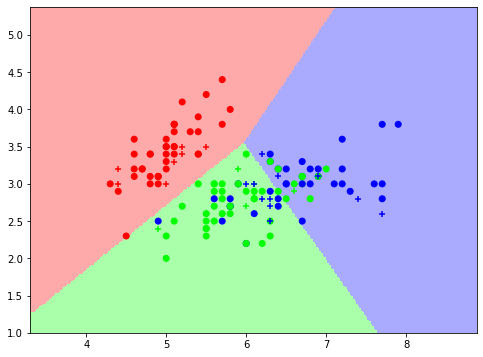

In [29]:
plot_cat_model(cat1, X_train, y_train, X_test, y_test)

In [30]:
# Compute the first two principle components

pca = PCA(n_components=2)
Xpca_train = pca.fit_transform(X_train)
Xpca_test = pca.transform(X_test)

In [31]:
# Train a new logistic model

cat2 = LogisticRegression(solver='lbfgs', multi_class='auto').fit(Xpca_train, y_train)
cat2.score(Xpca_train, y_train), cat2.score(Xpca_test, y_test)

(0.975, 0.8666666666666667)

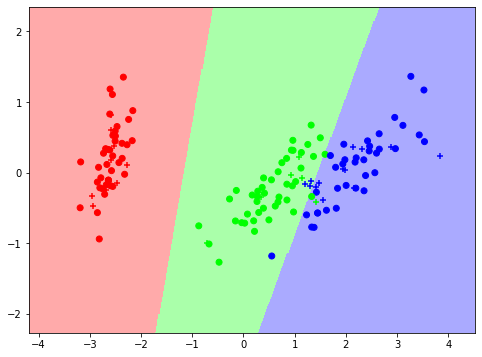

In [32]:
plot_cat_model(cat2, Xpca_train, y_train, Xpca_test, y_test)

### Warning

It is worth ending with a warning. PCA does not always lead us to a model with good results. You should think of it as one more tool in our toolbox. It is worth using it to try and identify the important characteristics, but

1. It is not the only method for doing that; and
2. It will not always produce an improved model.
3. For Linear Regression it is not likely to improve things as that is already using linear combinations of the factors.